## First stage: Registration and Data Upload

*Import liber*

In [237]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error


In [238]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

## Stage Two: Data Exploration and Cleaning

In [239]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [240]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [241]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [242]:
object_columns = train_data.select_dtypes(include=['object']).columns
object_data = train_data[object_columns]
print("Object Columns:", object_columns)


Object Columns: Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


In [243]:
num_columns = train_data.select_dtypes(include=['int64','float16']).columns
onum_data = train_data[num_columns]
print("int & flot Columns:", num_columns)

int & flot Columns: Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


*Data Cleaning*

In [244]:
missing_values_train = train_data.isna().sum()
print('Missing Values train:\n', missing_values_train[missing_values_train > 0])
missing_values_test= test_data.isna().sum()
print('Missing Values test:\n', missing_values_test[missing_values_test > 0])
print('duplicate  train rows:',test_data.duplicated().sum())
print('duplicate test rows:',test_data.duplicated().sum())

Missing Values train:
 LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64
Missing Values test:
 MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType       894
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars        

In [245]:
# Fill missing values in the training data
for column in train_data.columns:
    if train_data[column].dtype == 'object':  # If the column is categorical
        mode_value = train_data[column].mode()
        if not mode_value.empty:  # Check if mode exists
            train_data[column].fillna(mode_value[0], inplace=True)  # Fill with the mode
    else:  # If the column is numerical
        mean_value = train_data[column].mean()
        if not pd.isna(mean_value):  # Check if mean is not NaN
            train_data[column].fillna(mean_value, inplace=True)  # Fill with the mean

# Check for missing values after filling in the training data
missing_values_train_cleaned = train_data.isna().sum()
print('Missing Values After Filling in Train Data:\n', missing_values_train_cleaned[missing_values_train_cleaned > 0])

# Fill missing values in the test data
for column in test_data.columns:
    if test_data[column].dtype == 'object':  # If the column is categorical
        mode_value = test_data[column].mode()
        if not mode_value.empty:  # Check if mode exists
            test_data[column].fillna(mode_value[0], inplace=True)  # Fill with the mode
    else:  # If the column is numerical
        mean_value = test_data[column].mean()
        if not pd.isna(mean_value):  # Check if mean is not NaN
            test_data[column].fillna(mean_value, inplace=True)  # Fill with the mean

# Check for missing values after filling in the test data
missing_values_test_cleaned = test_data.isna().sum()
print('Missing Values After Filling in Test Data:\n', missing_values_test_cleaned[missing_values_test_cleaned > 0])


Missing Values After Filling in Train Data:
 Series([], dtype: int64)
Missing Values After Filling in Test Data:
 Series([], dtype: int64)


*Data Exploration*

Box plot for ExterQual vs Sale Price

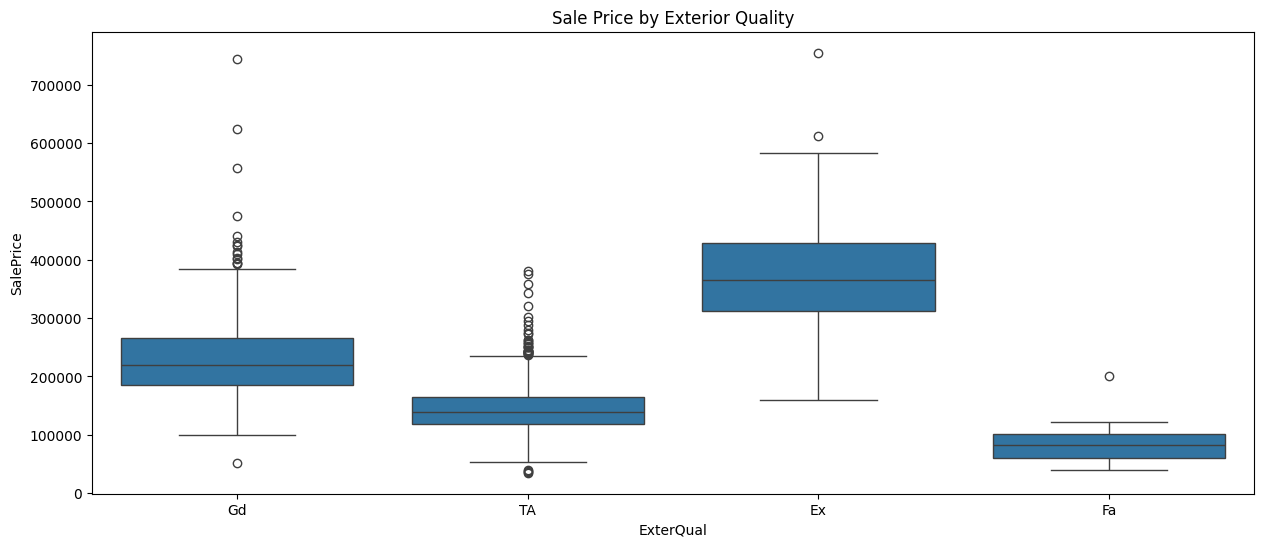

In [246]:
# Box plot for 'ExterQual' vs Sale Price
plt.figure(figsize=(15, 6))
sns.boxplot(data=train_data, x='ExterQual', y='SalePrice')
plt.title('Sale Price by Exterior Quality')
plt.show()


Count plot for Neighborhood

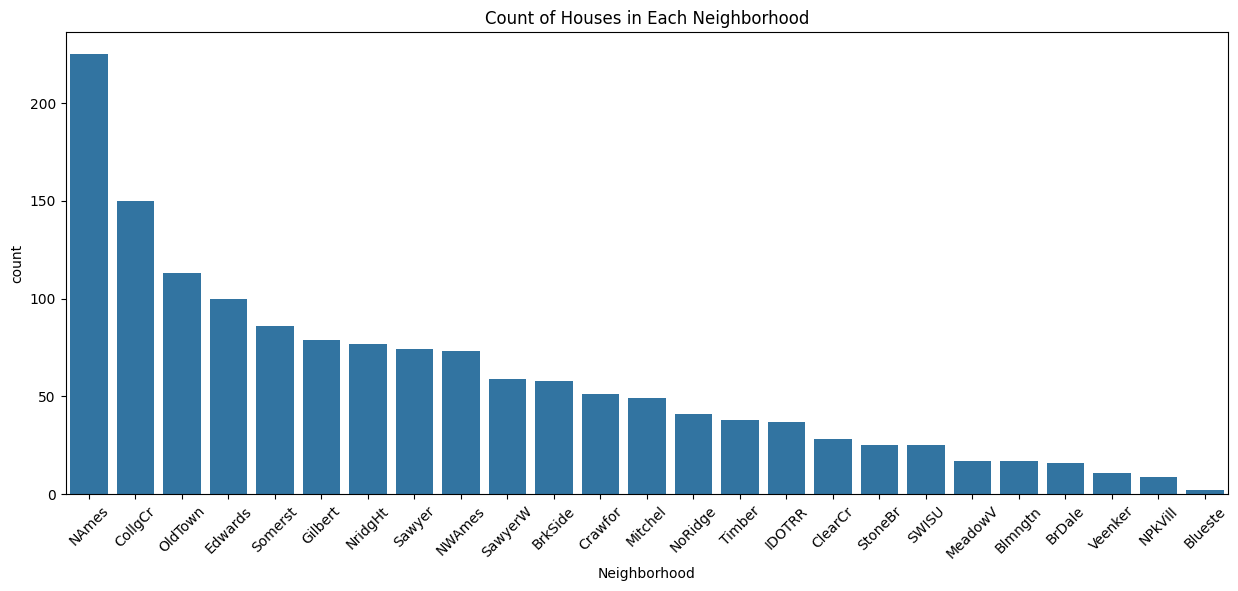

In [247]:
plt.figure(figsize=(15, 6))
sns.countplot(data=train_data, x='Neighborhood', order=train_data['Neighborhood'].value_counts().index)
plt.title('Count of Houses in Each Neighborhood')
plt.xticks(rotation=45)
plt.show()


Histogram for SalePrice

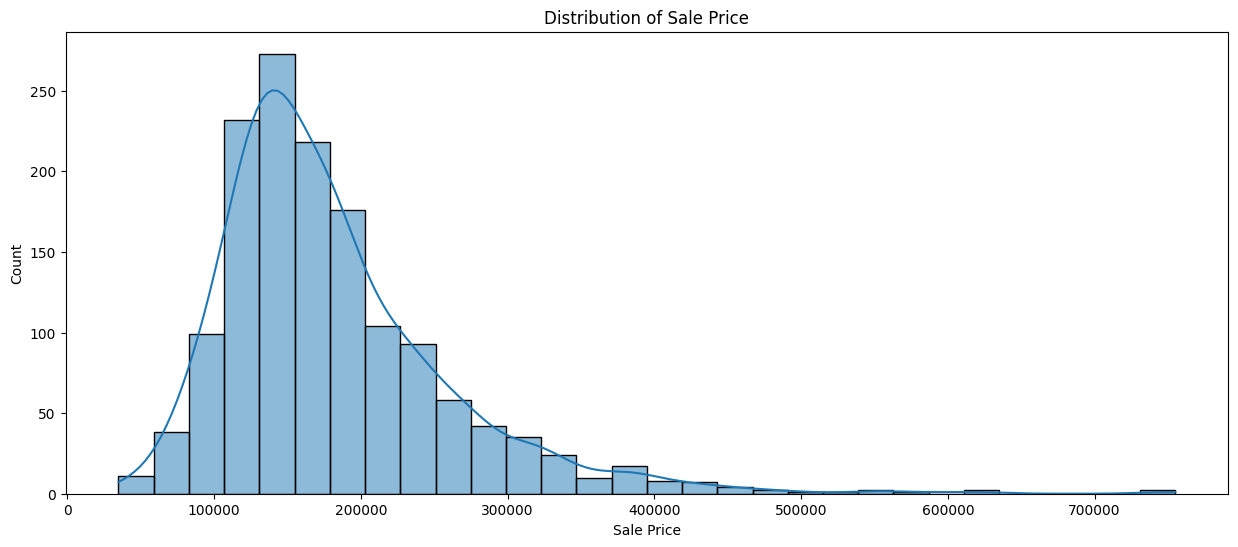

In [248]:
plt.figure(figsize=(15, 6))
sns.histplot(train_data['SalePrice'], bins=30, kde=True)
plt.title('Distribution of Sale Price')
plt.xlabel('Sale Price')
plt.show()


Scatter plot for GrLivArea vs Sale Price

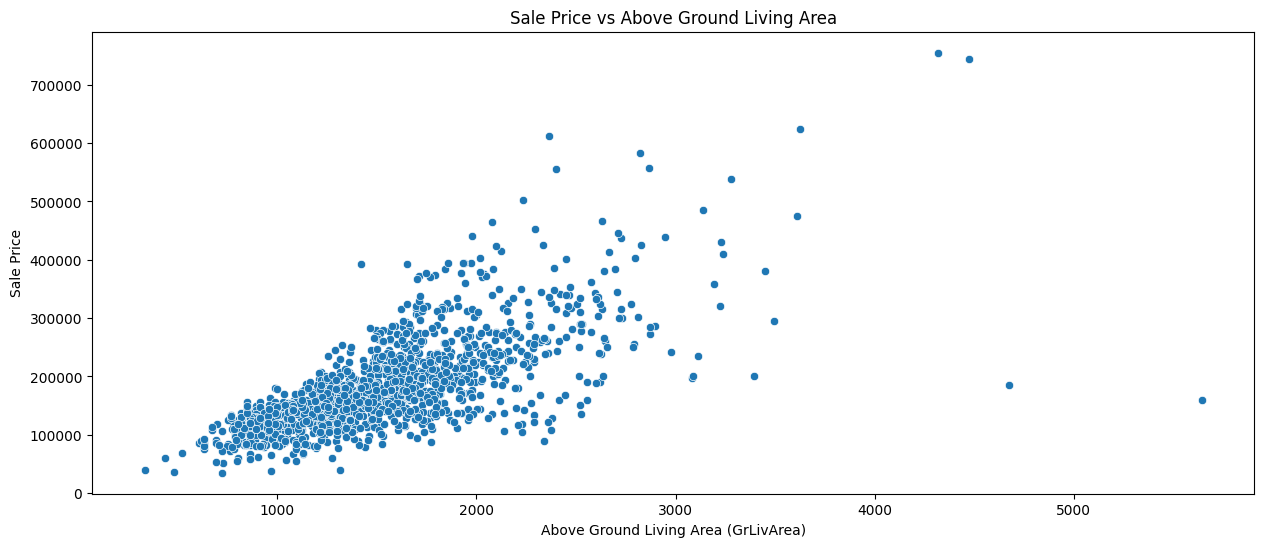

In [249]:
plt.figure(figsize=(15, 6))
sns.scatterplot(data=train_data, x='GrLivArea', y='SalePrice')
plt.title('Sale Price vs Above Ground Living Area')
plt.xlabel('Above Ground Living Area (GrLivArea)')
plt.ylabel('Sale Price')
plt.show()


 Correlation heatmap


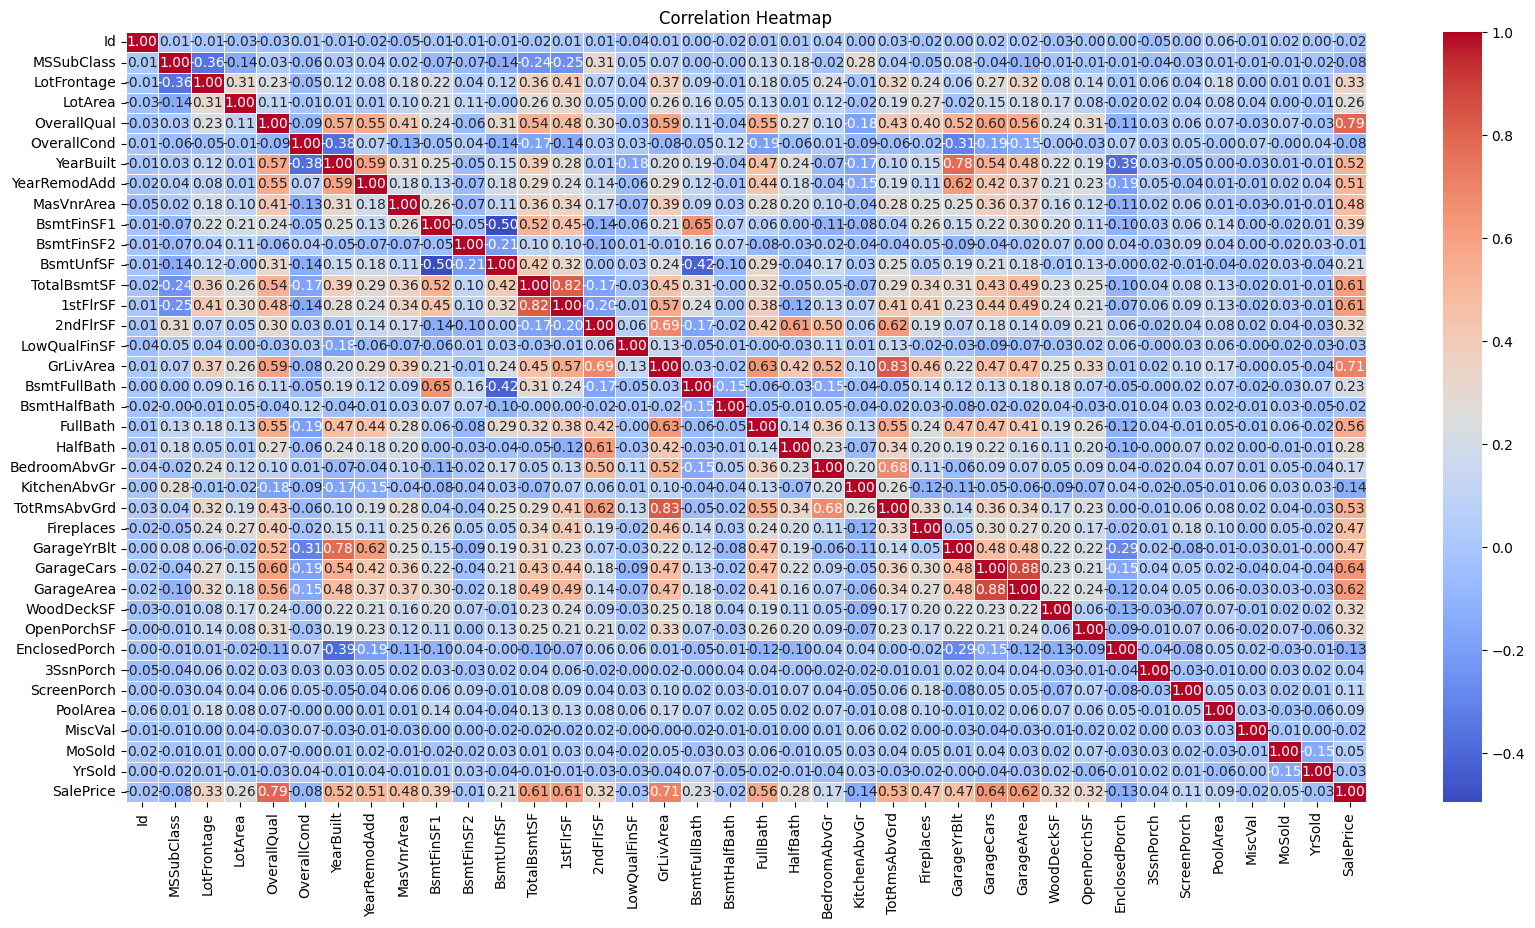

In [250]:
# Correlation heatmap
plt.figure(figsize=(20, 10))
numeric_data = train_data.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


# Third stage: Building models

*1- Prepare the Data*

In [251]:
train_data_encoded = pd.get_dummies(train_data, drop_first=True)
X_train = train_data_encoded.drop('SalePrice', axis=1)  # Features
y_train= train_data_encoded['SalePrice']  # Target
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


*2- Linear Regression Model*


In [252]:
# Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)


LinearRegression()

*3-Random Forest Model*

In [253]:
# Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

*3-XGBoost Model*

In [254]:
# XGBoost Model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

*4-Evaluate the Models*


In [255]:
# Linear Regression Predictions
y_pred_linear = linear_model.predict(X_test)
print("Linear Regression MAE:", mean_absolute_error(y_test, y_pred_linear))
print("Linear Regression MSE:", mean_squared_error(y_test, y_pred_linear))
print("Linear Regression R²:", r2_score(y_test, y_pred_linear))

# Random Forest Predictions
y_pred_rf = rf_model.predict(X_test)
print("Random Forest MAE:", mean_absolute_error(y_test, y_pred_rf))
print("Random Forest MSE:", mean_squared_error(y_test, y_pred_rf))
print("Random Forest R²:", r2_score(y_test, y_pred_rf))

# XGBoost Predictions
y_pred_xgb = xgb_model.predict(X_test)
print("XGBoost MAE:", mean_absolute_error(y_test, y_pred_xgb))
print("XGBoost MSE:", mean_squared_error(y_test, y_pred_xgb))
print("XGBoost R²:", r2_score(y_test, y_pred_xgb))

Linear Regression MAE: 20230.08541573505
Linear Regression MSE: 2641638813.2229924
Linear Regression R²: 0.6556028072511745
Random Forest MAE: 17641.30417808219
Random Forest MSE: 821760492.6202474
Random Forest R²: 0.8928649876911031
XGBoost MAE: 18001.516989511987
XGBoost MSE: 830740594.7418034
XGBoost R²: 0.891694228862992


# Fifth stage: Model optimization

*1. Hyperparameter Tuning with GridSearchCV*

*1.1 Linear Regression with Ridge Regularization*

In [256]:
ridge = Ridge()
ridge_params = {'alpha': [0.1, 1, 10, 100]}
ridge_grid = GridSearchCV(ridge, ridge_params, cv=5, scoring='neg_mean_squared_error')
ridge_grid.fit(X_train, y_train)
best_ridge = ridge_grid.best_estimator_

*1.2 Random Forest*

In [257]:
rf = RandomForestRegressor()
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
rf_grid = GridSearchCV(rf, rf_params, cv=5, scoring='neg_mean_squared_error')
rf_grid.fit(X_train, y_train)
best_rf = rf_grid.best_estimator_

*1.3 XGBoost*

In [258]:
xgb = xgb.XGBRegressor()
xgb_params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0]
}
xgb_grid = GridSearchCV(xgb, xgb_params, cv=5, scoring='neg_mean_squared_error')
xgb_grid.fit(X_train, y_train)
best_xgb = xgb_grid.best_estimator_

 *1.4 Making predictions with the best models*


In [259]:
y_pred_ridge = best_ridge.predict(X_test)
y_pred_rf = best_rf.predict(X_test)
y_pred_xgb = best_xgb.predict(X_test)

*1.5 Evaluating the models*


In [260]:
print("Ridge Regression MSE:", mean_squared_error(y_test, y_pred_ridge))
print("Ridge Regression R^2:", r2_score(y_test, y_pred_ridge))

print("Random Forest MSE:", mean_squared_error(y_test, y_pred_rf))
print("Random Forest R^2:", r2_score(y_test, y_pred_rf))

print("XGBoost MSE:", mean_squared_error(y_test, y_pred_xgb))
print("XGBoost R^2:", r2_score(y_test, y_pred_xgb))

Ridge Regression MSE: 946611384.1196436
Ridge Regression R^2: 0.8765878583843455
Random Forest MSE: 924463905.4582303
Random Forest R^2: 0.8794752816911484
XGBoost MSE: 723723937.5580369
XGBoost R^2: 0.9056462635344107


*2.Hyperparameter Tuning with RandomizedSearchCV*

*2.1  Linear Regression with Ridge Regularization*


In [261]:
ridge = Ridge()
ridge_params = {'alpha': np.logspace(-3, 3, 7)}  # Logarithmic scale for alpha
ridge_random = RandomizedSearchCV(ridge, ridge_params, n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
ridge_random.fit(X_train, y_train)
best_ridge = ridge_random.best_estimator_


c:\Users\MADRID\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 7 is smaller than n_iter=10. Running 7 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


*2.2 Random Forest*


In [262]:
rf = RandomForestRegressor()
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
rf_random = RandomizedSearchCV(rf, rf_params, n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rf_random.fit(X_train, y_train)
best_rf = rf_random.best_estimator_

*2.3 XGBoost*


In [264]:
from xgboost import XGBRegressor
xgb =XGBRegressor()
xgb_params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0]
}
xgb_random = RandomizedSearchCV(xgb, xgb_params, n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
xgb_random.fit(X_train, y_train)
best_xgb = xgb_random.best_estimator_

*2.4 Making predictions with the best models*


In [265]:
y_pred_ridge = best_ridge.predict(X_test)
y_pred_rf = best_rf.predict(X_test)
y_pred_xgb = best_xgb.predict(X_test)

*2.5 Evaluating the models*

In [266]:
print("Ridge Regression MSE:", mean_squared_error(y_test, y_pred_ridge))
print("Ridge Regression R^2:", r2_score(y_test, y_pred_ridge))

print("Random Forest MSE:", mean_squared_error(y_test, y_pred_rf))
print("Random Forest R^2:", r2_score(y_test, y_pred_rf))

print("XGBoost MSE:", mean_squared_error(y_test, y_pred_xgb))
print("XGBoost R^2:", r2_score(y_test, y_pred_xgb))

Ridge Regression MSE: 946611384.1196436
Ridge Regression R^2: 0.8765878583843455
Random Forest MSE: 854378753.4712857
Random Forest R^2: 0.8886124617919471
XGBoost MSE: 723723937.5580369
XGBoost R^2: 0.9056462635344107


# Sixth stage: Forecasting and presenting results

In [292]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
# Separate features and target variable
X = train_data.drop('SalePrice', axis=1)  # Features
y = train_data['SalePrice']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify categorical features
categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()

# Create a preprocessor for categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'  # Keep other features unchanged
)

# Create a pipeline that first transforms the data and then fits the model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', XGBRegressor())  # Use the desired model here
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Prepare the test dataset for predictions
# Assuming 'test_data' is your test dataset
X_test_final = test_data.drop(columns='SalePrice', errors='ignore')  # Exclude SalePrice if present

# Make predictions on the processed test dataset
predictions = pipeline.predict(X_test_final)

# Create a submission DataFrame
submission = pd.DataFrame({
    'Id': test_data['Id'],  # Ensure 'Id' is present in test_data
    'SalePrice': predictions  # Add the predicted Sale Prices
})

# Save to CSV
submission.to_csv('submission.csv', index=False)

print("Submission file created: submission.csv")

Submission file created: submission.csv


In [293]:
submission.head()

,Id,SalePrice
0,1461,144272.859375
1,1462,158339.578125
2,1463,173380.140625
3,1464,188898.796875
4,1465,204839.703125
